## Retrieve address coordinates from geopunt.be

In [208]:
def get_address():

    import requests
    import json
    from shapely.geometry import box

    #address = input("Enter Street:")
    address = 'Desguinlei 17'

    req = requests.get(f"http://loc.geopunt.be/geolocation/location?q={address}&c=1",)

    #Address boundary box for masking #this looks like a point not a boundary box
    boundingbox = req.json()["LocationResult"][0]['BoundingBox']
    minx = boundingbox['LowerLeft']['X_Lambert72']
    miny = boundingbox['LowerLeft']['Y_Lambert72']
    maxx = boundingbox['UpperRight']['X_Lambert72']
    maxy = boundingbox['UpperRight']['Y_Lambert72']
    b = (minx, miny, maxx, maxy)
    bbox = box(minx, miny, maxx, maxy)
    
    address_id = d()["LocationResult"][0]['ID']
    
    return address_id

get_address()

2644416

In [207]:
#Also can get building geometry polygon from https://docs.basisregisters.dev-vlaanderen.be/docs/api-documentation.html#section/Technische-Info
import requests
import json

objectId = 2644416
req = requests.get(f"https://api.basisregisters.dev-vlaanderen.be/v1/gebouwen?q={objectId}").json()
#req = requests.get(f'https://api.basicregisters.dev-vlaanderen.be/v1/adresmatch/{objectId}').json()

#for k,v in req.json()["LocationResult"][0].items():
#   print(f"{k} : {v}")
#print(json.dumps(req, indent=4, sort_keys=True))
#polygon = [req["geometriePolygoon"]["polygon"]]

#this works but may need authentication
#https://api.basisregisters.dev-vlaanderen.be/v1/gebouwen/6/json

In [204]:
#Retrieve meta data for all raster files

def get_meta():
    
    #Get list of all geotiff files
    import os
    
    path = os.path.abspath('../')
    folder_path = path
    
    #Modify to select .tifs
    #Also modify to read DSM files together and DTM files together
    for path, dirs, files in os.walk(folder_path):
        for filename in files:
            f = open(os.path.join(path, filename))
            filelist = f.read()
    
    #For file in list read meta data
    import rasterio
    import pandas as pd
    
    #Make empty data frame
    
    for file in filelist:
        with rasterio.open(file) as src:
            meta = src.meta()
            path = file
            
    #Append meta data to dataframe
    
    #Write df to a file
    
    return

In [205]:
#Search for correct geotiff file containing address

def address_raster():
    import pandas as pd
    df = pd.read_csv("address_raster")
    ##maybe use geopandas instead
    
    ##check which raster.bounds intersects with the address bounds
    
    ##return path to intersecting raster
    
    return path


In [209]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
#import pycrs

geo = gpd.GeoDataFrame({'geometry': b}, index=[0], crs=dsm.crs.data)

geo = geo.to_crs(crs=dsm.crs.data)
print(geo)
print(b)

AttributeError: 'numpy.ndarray' object has no attribute 'crs'

In [56]:
import json
coords = json.loads(geo.to_json())['features'][0]['geometry']
print(coords)

{'type': 'Polygon', 'coordinates': [[[147265.84, 172710.95], [147265.84, 172710.95], [147265.84, 172710.95], [147265.84, 172710.95]]]}


In [71]:
#Nice library
import georaster
f='/home/becode/dr-robin/theano/3D_houses_data/DHMVIIDSMRAS1m_k15.tif'
#im = georaster.SingleBandRaster(f, load_data=b, latlon=False, band=1, geo_transform=)
im = georaster.SingleBandRaster(f)

##slicing georaster
print(dir(im))
ss = im.r[1:50,1:50]

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ss)
plt.show()

In [26]:
# transform image
bands,rows,cols = np.shape(ar)
image1 = ar.reshape (rows*cols,bands)
print(np.shape(image1))

(640000000, 1)


## Slicing raster based on window

In [195]:
##This works very well
import rasterio
from rasterio.windows import Window
import numpy as np

dsmfile = '/home/becode/dr-robin/theano/3D_houses_data/DHMVIIDSMRAS1m_k15.tif'
dtmfile = '/home/becode/dr-robin/theano/3D_houses_data/DHMVIIDTMRAS1m_k15.tif'
win = Window(0, 0, 100, 100)

with rasterio.open(dsmfile, window = win, crop=True) as src:
    dsm = src.read(1, window = win)
    
with rasterio.open(dtmfile, window = win, crop=True) as src:
    dtm = src.read(1, window = win)

##Calculate DEM 
dem = dsm - dtm

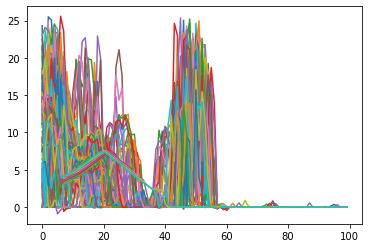

In [200]:
#Plot dem
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(dem)
plt.show()

In [210]:
#need to install earthpy in conda env (gdal_test)
# calculate canopy height model
import earthpy.plot as ep
import matplotlib.pyplot as plt

ep.plot_bands(dem,
              cmap='viridis',
              title="Digital Elevation Model(DHM)")
plt.show()

ModuleNotFoundError: No module named 'earthpy'

In [13]:
###Interesting library to convert raster to xyz
from raster2xyz.raster2xyz import Raster2xyz

f='/home/becode/dr-robin/theano/3D_houses_data/DHMVIIDSMRAS1m_k15.tif'
out_csv = "/home/becode/dr-robin/theano/3D_houses_data/out_xyz.csv"
Raster2xyz.translate(input_raster=f, out_xyz=out_csv)

TypeError: translate() missing 1 required positional argument: 'self'

In [58]:
#Perhaps another way to crop raster using mask on building polygon

#out_tif = r"'zip:///home/becode/dr-robin/theano/3D_houses_data/DHMVIIDSMRAS1m_k15.zip!/GeoTIFF/DHMVIIDSMRAS1m_k15cropped.tif"

masked, out_transform = mask(dataset=dsm,
                             shapes=coords,
                             all_touched=False,
                             invert=False,
                             nodata=None,
                             filled=True,
                             crop=True, pad=False, pad_width=0.5,indexes=None)
#out_meta = dsm.meta.copy()

AttributeError: 'str' object has no attribute 'get'

## Retrieve address boundary box (polygon) for clipping 

In [5]:

import shapely
import geopandas as gpd
from fiona.crs import from_epsg

#Converts bbox to Geopandas series
#crs="EPSG:31370" not specified in GeoDataFrame
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=data.crs)
print(type(geo))
print(geo.geometry)

ModuleNotFoundError: No module named 'shapely'

In [106]:
bounding_box = geo.envelope
df = gpd.GeoDataFrame(gpd.GeoSeries(bounding_box), columns=['geometry']).to_crs(c)

In [107]:
bounding_box.crs

<Bound CRS: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B ...>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- [east]: X (metre)
- [north]: Y (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from Belge 1972 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich
Source CRS: Belge 1972 / Belgian Lambert 72

In [4]:
## Store DSM and DTM shape and raster files in cloud or retrieve using webservice

#Get DSM file
#http://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m
#Get DTM file
#http://www.geopunt.be/download?container=dhm-vlaanderen-ii-dtm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DTM,%20raster,%201m

#Try using geopunt webservice to retrieve DSM and DTM files

#Could also try importing zip files to geopandas or rasterio

## ADD CODE FOR RELATIVE PATH TO DSM AND DTM SHAPE AND RASTER FILES

## Clip/Mask DHM using address boundary box
# Actually could mask DSM and DTM before calculating DHM

In [5]:
##also possible to just download DHM files directly

In [ ]:
##MAYBE A SIMPLER APPROACH TO CLIPPING
https://carpentries-incubator.github.io/geospatial-python/11-vector-plot-vector-raster/index.html

In [84]:
#https://automating-gis-processes.github.io/CSC18/lessons/L6/clipping-raster.html
import rasterio

from rasterio.plot import show

from rasterio.plot import show_hist

from rasterio.mask import mask

from shapely.geometry import box

import geopandas as gpd

from fiona.crs import from_epsg

import pycrs

geotifffile_dsm = '/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01.tif'
geotifffile_dsm_clipped = r'/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01_clipped.tif'

data = rasterio.open(geotifffile_dsm)
#show(data, cmap='terrain')
print(data.transform)
geo.shape

| 1.00, 0.00, 145000.00|
| 0.00,-1.00, 247000.00|
| 0.00, 0.00, 1.00|


(1, 1)

In [2]:
#fast one liner, if library installs
import gdal
from raster2xyz.raster2xyz import Raster2xyz

input_raster = '/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01.tif'
out_csv = "/tmp/out_xyz.csv"

rtxyz = Raster2xyz()
rtxyz.translate(input_raster, out_csv)

ModuleNotFoundError: No module named 'raster2xyz'

In [ ]:
#convert raster to xyz
import rasterio
import numpy as np
import csv
filename = '/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01.tif'
with rasterio.open(filename) as src:
    #read image
    image= src.read()
    # transform image
    bands,rows,cols = np.shape(image)
    image1 = image.reshape (rows*cols,bands)
    print(np.shape(image1))
    # bounding box of image
    l,b,r,t = src.bounds
    #resolution of image
    res = src.res
    res = src.res
    # meshgrid of X and Y
    x = np.arange(l,r, res[0])
    y = np.arange(t,b, -res[0])
    X,Y = np.meshgrid(x,y)
    print (np.shape(X))
    # flatten X and Y
    newX = np.array(X.flatten(order='C'))
    newY = np.array(Y.flatten(order='C'))
    print (np.shape(newX))
    # join XY and Z information
    export = np.column_stack((newX, newY, image1))
    fname='XYZ.csv'
   # with open(fname, 'w') as fp:
    #    a = csv.writer(fp, delimiter=',')
     #   a.writerows(export)
      #  fp.close() # close file
       # print("done")

(153000000, 1)
(9000, 17000)
(153000000,)


In [1]:
#convert raster to xyz
import rasterio
import numpy as np
import csv
filename = '/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01.tif'
src = rasterio.open(filename)
#read image
image= src.read()
# transform image
bands,rows,cols = np.shape(image)
image1 = image.reshape (rows*cols,bands)
print(np.shape(image1))
# bounding box of image
l,b,r,t = src.bounds
#resolution of image
res = src.res
# meshgrid of X and Y
x = np.arange(l,r, res[0])
y = np.arange(t,b, -res[0])
X,Y = np.meshgrid(x,y)
print(np.shape(X))
# flatten X and Y #ADD ORDER = 'C' or 'K'
newX = np.array(X.flatten)
#newY = np.array(Y.flatten)
fname='X.csv'
with open(fname, 'a') as f:
    print(newX, file=f)
    
    #a = csv.writer(fp, delimiter=',')
    #a.writerows(newX)
    #fp.close()
#print(np.shape(newX))
# join XY and Z information
#perhaps read columns to separate text files, then combine with greb????
#export = np.column_stack((newX, newY, image1))

   # with open(fname, 'w') as fp:
    #    a = csv.writer(fp, delimiter=',')
     #   a.writerows(export)
      #  fp.close() # close file
print("done")
src.close()

(153000000, 1)
(9000, 17000)
done


In [76]:
g = geo.to_crs(crs=data.crs.data)

#g = geo.shape

def getFeatures(gdf):
"""Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
       return [json.loads(gdf.to_json())['features'][0]['geometry']]

coords = getFeatures(g)

geo.shape

print(coords)
#clip=True or crop=True
out_img, out_transform = mask(dataset=data, shapes=coords, crop=True)
out_meta = data.meta.copy()
print(out_meta)

epsg_code = int(data.crs.data['init'][5:])
print(epsg_code)

out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": pycrs.parser.from_epsg_code(epsg_code).to_proj4()}
               )

with rasterio.open(geotifffile_dsm_clipped, "w", **out_meta) as dest:
    dest.write(out_img)
    
clipped = rasterio.open(geotifffile_dsm_clipped)

show((clipped, 5), cmap='terrain')

[{'type': 'Polygon', 'coordinates': [[[144419.86, 169531.37], [144419.86, 169531.37], [144419.86, 169531.37], [144419.86, 169531.37]]]}]


ValueError: Input shapes do not overlap raster.

In [96]:
#print(dir(data))
print(data.crs)
print(geo.crs)
print(data.bounds)
#print(dir(geo.geometry))
print(geo.geometry.array[0])



geo.plot
plt.show()

EPSG:31370
None
BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)
POLYGON ((144419.86 169531.37, 144419.86 169531.37, 144419.86 169531.37, 144419.86 169531.37))


## Opening shape files in geopandas

In [8]:
import geopandas as gpd
dsm_shp = "/home/becode/dr-robin/theano/3D_houses_data/DSM/DHMVII_vdc_k01.shp"
dtm_shp = "/home/becode/dr-robin/theano/3D_houses_data/DTM/DHMVII_vdc_k01.shp"
dsm_map = gpd.read_file(dsm_shp)
dtm_map = gpd.read_file(dtm_shp)
#could be useful
#dsm_map.clip
#dsm_map.diff()
#c = gpd.clip(dsm_map, geo, keep_geom_type=False)


In [18]:
dsm_map.geometry == dtm_map.geometry

0    True
1    True
2    True
Name: geometry, dtype: bool

In [21]:
geo.set_crs(epsg=31370)

,geometry
0,"POLYGON ((144419.860 169531.370, 144419.860 16..."


In [37]:
#geo.geometry.plot()
#geo.geometry
geo.set_crs(epsg="31370")
b

NameError: name 'b' is not defined

In [22]:
c = gpd.clip(dsm_map, geo, keep_geom_type=False)

/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:31370
Right CRS: None

  """Entry point for launching an IPython kernel.


## Clip/mask shape files using address boundary box

In [ ]:
##https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/vector-data-processing/clip-vector-data-in-python-geopandas-shapely/
"""
Clip() takes three arguments:

gdf: Vector layer (point, line, polygon) to be clipped to mask.
mask: Polygon vector layer used to clip gdf. The mask’s geometry is dissolved into one geometric feature and intersected with gdf.
keep_geom_type: If True, return only geometries of original type in case of intersection resulting in multiple geometry types or GeometryCollections. If False, return all resulting geometries (potentially mixed-types). Default value is False (You don’t need to worry about this argument for this assignment)

# For example to clip using points
# Clip the data using GeoPandas clip
points_clip = gpd.clip(pop_places, country_boundary_us)

# View the first 6 rows and a few select columns
points_clip[['name', 'geometry', 'scalerank', 'natscale', ]].head()

###NOTE: CLIPPING USING POLYGON/BOUNDARY BOX SLIGHTLY DIFFERENT
Clip a Line or Polygon Layer to An Extent
The process for clipping a line or polygon layer is slightly different than clipping a set of points. To clip a line of polygon feature you will do the following:

Ensure that your polygon and line layer are in the same coordinate reference system
Identify what features in the lines layer fall WITHIN the boundary of the polygon layer
Subset the features within the geometry and reset the geometry of the newly clipped layer to be equal to the clipped data.
This last step may seem unusual. When you clip data using shapely and geopandas the default behaviour is for it to only return the clipped geometry. However you may with to also retain the attributes associated with the geometry. This is where the set_geometry() methods comes into play.

For this example you will use the country_boundary layer and a clipped version of the natural earth 10m roads layer. * Import ne_10m_n_america_roads.shp into python.

Next, check to ensure that the roads and country boundary are in the same CRS. You may need to reproject the data.
Because spatial operations take time, it’s best if you subset your data as much as possible prior to clipping.
# Open the roads layer
ne_roads_path = os.path.join("data", "spatial-vector-lidar", "global", 
                             "ne_10m_roads", "ne_10m_roads.shp")
ne_roads = gpd.read_file(ne_roads_path)

# Are both layers in the same CRS?
if (ne_roads.crs == country_boundary_us.crs):
    print("Both layers are in the same crs!",
          ne_roads.crs, country_boundary_us.crs)
Both layers are in the same crs! epsg:4326 epsg:4326

"""

In [3]:
'''
#opening and ploting DSM and DTM shape data
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

dsm_shp = "/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVII_vdc_k01.shp"
dtm_shp = "/home/becode/dr-robin/theano/3D_houses data/DTM/DHMVII_vdc_k01.shp"

dsm_map = gpd.read_file(dsm_shp)
fig, ax = plt.subplots(figsize = (15,15))
dsm_map.plot(ax=ax)

dtm_map = gpd.read_file(dtm_shp)
fig, ax = plt.subplots(figsize = (15,15))
dtm_map.plot(ax=ax)

##Doesn't work with shape files
dhm_map = dsm_map - dtm_map

dsm_map.area
dsm_map.bounds
dsm_map.columns
#dsm_map.contains

#could be useful
dsm_map.clip
dsm_map.diff()
'''

'\n#opening and ploting DSM and DTM shape data\nimport matplotlib.pyplot as plt\nimport descartes\nimport geopandas as gpd\nfrom shapely.geometry import Point, Polygon\n\n%matplotlib inline\n\ndsm_shp = "/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVII_vdc_k01.shp"\ndtm_shp = "/home/becode/dr-robin/theano/3D_houses data/DTM/DHMVII_vdc_k01.shp"\n\ndsm_map = gpd.read_file(dsm_shp)\nfig, ax = plt.subplots(figsize = (15,15))\ndsm_map.plot(ax=ax)\n\ndtm_map = gpd.read_file(dtm_shp)\nfig, ax = plt.subplots(figsize = (15,15))\ndtm_map.plot(ax=ax)\n\ndhm_map = dsm_map - dtm_map\n'

In [120]:
import rasterio as rio

k01_dsm = 'zip:///home/becode/Downloads/DSM/DHMVIIDSMRAS1m_k01.zip!/GeoTIFF/DHMVIIDSMRAS1m_k01.tif'
k02_dsm = 'zip:///home/becode/Downloads/DSM/DHMVIIDSMRAS1m_k02.zip!/GeoTIFF/DHMVIIDSMRAS1m_k02.tif'

#to access web zip file
#'zip+https://example.com/file.tif&p=x&q=y!/folder/file.tif'

#to access zip file from AWS S3
#'s3://landsat-pds/L8/139/045/LC81390452014295LGN00/LC81390452014295LGN00_B1.TIF'

k01_dsm = rio.open(k01_dsm)
k02_dsm = rio.open(k02_dsm)

# View generate metadata associated with the raster file
print(k01_dsm.meta)

# What is the spatial resolution?
print(k02_dsm.res)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}
(1.0, 1.0)


In [13]:
#Opening a geotiff file

import os
import rasterio as rio
import earthpy as et

geotifffile = '/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01.tif'
#open geotiff file
with rio.open(geotifffile) as lidar_dsm:
    lidar_dsm.bounds

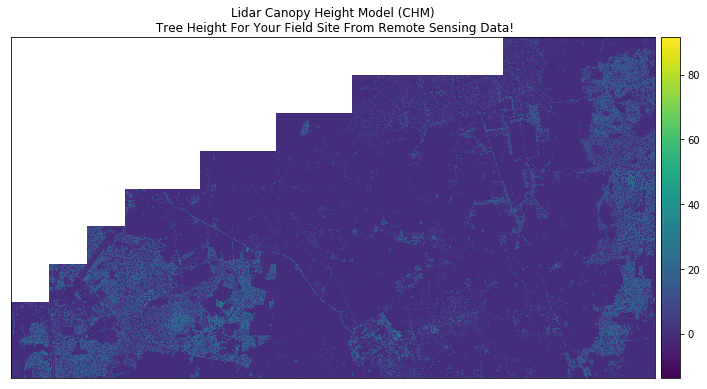

In [2]:
import rasterio as rio 
from rasterio import plot

geotifffile_dsm = '/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01.tif'
geotifffile_dtm = '/home/becode/dr-robin/theano/3D_houses data/DTM/DHMVIIDTMRAS1m_k01.tif'

#subtract DTM from DSM to get DHM geotiff
with rio.open(geotifffile_dtm) as dtm:
    lidar_dtm_im = dtm.read(1, masked=True)
 #   sjer_ext = rio.plot.plotting_extent(src)
    
with rio.open(geotifffile_dsm) as dsm:
    lidar_dsm_im = dsm.read(1, masked=True)
#    dsm_meta = src.profile
    
# calculate canopy height model
import earthpy.plot as ep
import matplotlib.pyplot as plt

lidar_dhm_im = lidar_dsm_im - lidar_dtm_im

ep.plot_bands(lidar_dhm_im,
              cmap='viridis',
              title="Lidar Digital Height Model(DHM)")
plt.show()


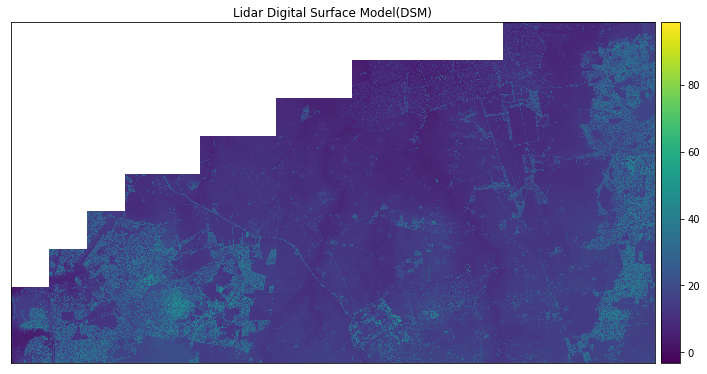

In [3]:
ep.plot_bands(lidar_dsm_im,
              cmap='viridis',
              title="Lidar Digital Surface Model(DSM)")
plt.show()

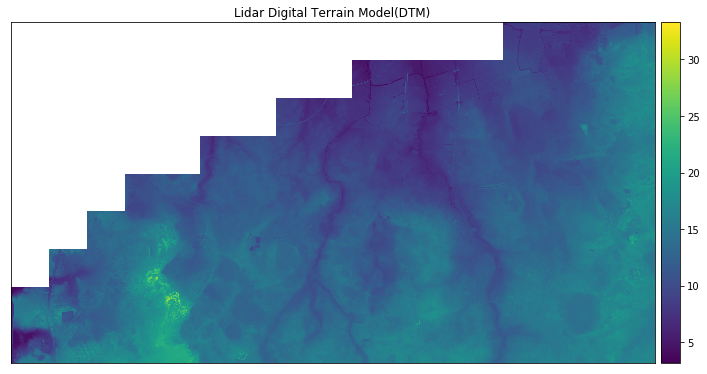

In [4]:
ep.plot_bands(lidar_dtm_im,
              cmap='viridis',
              title="Lidar Digital Terrain Model(DTM)")
plt.show()

## Plotting DSM and DTM geotiff 

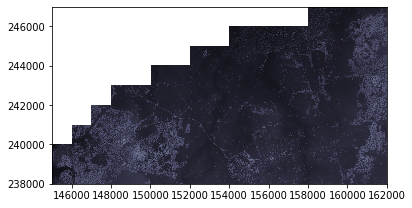

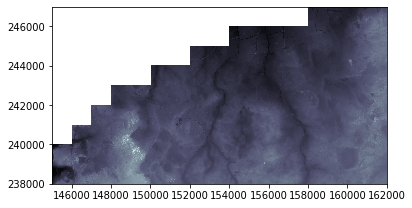

In [2]:
import rasterio as rio
from rasterio import plot

dsm = rio.open('/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01.tif')
dtm = rio.open('/home/becode/dr-robin/theano/3D_houses data/DTM/DHMVIIDTMRAS1m_k01.tif')
from rasterio import plot
rio.plot.show(dsm, cmap='bone')
rio.plot.show(dtm, cmap='bone')

In [59]:
dsm.name
dsm.mode
dsm.closed
array = dsm.read(1)

#print(array.shape)

#from matplotlib import pyplot
#pyplot.imshow(array, cmap='pink')

#pyplot.show()  

NameError: name 'dsm' is not defined

In [8]:
dataset.width
dataset.height
#Every pixel in tif file is contained within a spatial bounding box (in metres) that is mapped to a region on the earth's surface
dataset.bounds
#geospatial transform that maps pixel locations (row, col coordinates) to spatial position (x, y)
dataset.transform
#gets the top left corner
dataset.transform * (0,0)

#get the bottom right corner
dataset.transform * (dataset.width, dataset.height)

#coordinate values are relative to the origin of the dataset's coordinate reference system (CRS)
dataset.crs

#access raster band by band's index number
dataset.indexes
band1 = dataset.read(1)



In [11]:
#access values inarray by row and column index
band1[dataset.height // 2, dataset.width // 2]

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.693e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.686e+01,  1.688e+01,
         1.690e+01]], dtype=float32)

In [17]:
#get array indices for points in the georeferenced space using index
#for example get the value for the pixel 100km east and 50km south
x, y = (dataset.bounds.left + 1000, dataset.bounds.top - 1000)
row, col = dataset.index(x, y)

print(band1[row, col])

-9999.0


In [18]:
#get the spatial coordinates of a pixel
#coordinates of center of the image
dataset.xy(dataset.height // 2, dataset.width // 2)

(153500.5, 242499.5)

In [ ]:
#Potential to convert Geotiffs to Cloud Optimized Geotiffs
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

# Specify the path for Landsat TIF on AWS
fp = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'

# See the profile
with rio.open(fp) as src:
    print(src.profile)
    

In [36]:
#Approach to slice raster using pixel window
#Need to transform address polygon coordinates to pixel window

import rasterio
from rasterio.windows import Window
import numpy as np

f='/home/becode/dr-robin/theano/3D_houses_data/DHMVIIDSMRAS1m_k15.tif'

#win = Window(0, 0, 100, 100)
#with rasterio.open(f, window = win) as src:
#src=rasterio.open(f, window = win)
#read image

with rasterio.open('/home/becode/dr-robin/theano/3D_houses_data/DHMVIIDSMRAS1m_k15.tif') as src:
    #read a subset of raster 
    win = Window(0, 0, 100, 100)
    #w = src.read(1, window = win)
    src_transform = src.transform
    #win_transform = src.window_transform(win)
    
    image = src.read(1, window = win)
    rows = src.width
    cols = src.height
    bands = src.count
    #src_transform = src.transform
    #win_transform = src.window_transform(win)
# transform image

    #image1 = image.reshape (rows*cols,bands)
    #print(np.shape(image1))
# bounding box of image
    l,b,r,t = src.bounds
#resolution of image
    #res = src.res

# meshgrid of X and Y
    #x = np.arange(l,r, res[0])
    #y = np.arange(t,b, -res[0])
##REQUIRES TOO MUCH MEMORY
#X,Y = np.meshgrid(x,y)
#print (np.shape(X))

#print(type(X))
# flatten X and Y
#newX = np.array(X.flatten('F'))
#print('x done')
#newY = np.array(Y.flatten('F'))
#xyz = np.column_stack((newX, newY, image1))